<a href="https://colab.research.google.com/github/Somnath1998g/Projects/blob/main/handwritten%20digits%20recognize%20by%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [59]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [60]:
len(dataset)

60000

In [61]:
test_dataset=MNIST(root='data/', train=False)
len(test_dataset)

10000

Let's look at a sample element from the training dataset.

In [62]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F0F27D2A200>, 5)

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  0


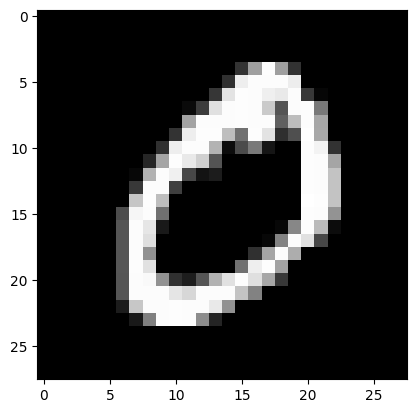

In [64]:
image, label= dataset[1]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  3


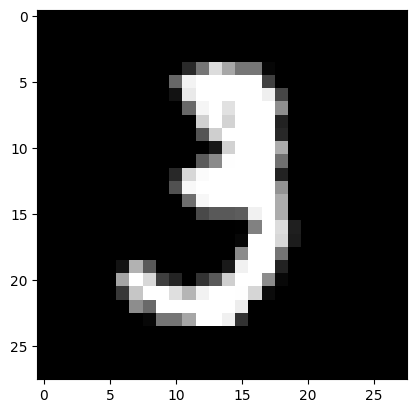

In [65]:
image, label=dataset[10]
plt.imshow(image, cmap="gray")
print('Label: ', label)

PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [66]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The torchvision.transforms module contains many such predefined functions. We'll use the ToTensor transform to convert images into PyTorch tensors.

In [67]:
dataset=MNIST(root='data/',
              train=True,
              transform=transforms.ToTensor())

In [68]:
img_tensor, label = dataset[1]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 0


In [69]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.9333, 0.9882, 0.9882, 0.7020, 0.0471],
        [0.9922, 0.9137, 0.8157, 0.3294, 0.0000],
        [0.9412, 0.2784, 0.0745, 0.1098, 0.0000],
        [0.2471, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with `0` representing black, `1` white, and the values in between different shades of grey. We can also plot the tensor as an image using 'plt.imshow'.

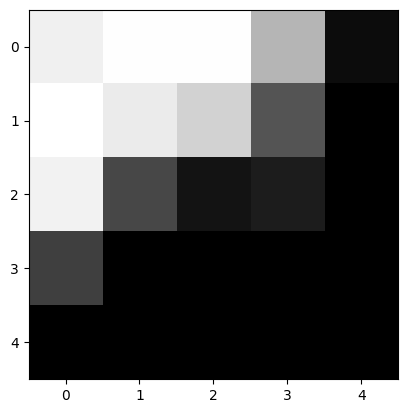

In [70]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

# Training and Validation Datasets

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [71]:
from torch.utils.data import random_split
train_ds, val_ds= random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

We can now create data loaders to help us load the data in batches. We'll use a batch size of 128.

In [72]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

Here we use the Logistic Regression as our model

In [73]:
import torch.nn as nn
input_size = 28*28
num_classes = 10
# Logistic Regression model
model= nn.Linear(input_size, num_classes)

Let's take a look at the weights and biases.

In [74]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0027,  0.0299,  0.0103,  ...,  0.0349, -0.0005, -0.0153],
        [ 0.0210, -0.0269, -0.0012,  ...,  0.0077,  0.0045,  0.0356],
        [ 0.0244, -0.0139,  0.0226,  ...,  0.0100,  0.0154,  0.0182],
        ...,
        [-0.0163, -0.0274,  0.0112,  ..., -0.0224,  0.0161, -0.0332],
        [-0.0083,  0.0034,  0.0285,  ...,  0.0178, -0.0199,  0.0011],
        [ 0.0327, -0.0289, -0.0018,  ..., -0.0288,  0.0243, -0.0315]],
       requires_grad=True)

In [75]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0074, -0.0040, -0.0009,  0.0147,  0.0335,  0.0263,  0.0055, -0.0134,
         0.0270, -0.0353], requires_grad=True)

In [76]:
images, labels in train_loader

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the '.reshape' method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data.

In [77]:
images.shape

torch.Size([128, 1, 28, 28])

In [78]:
images.reshape(128, 784).shape

torch.Size([128, 784])

To include this additional functionality within our model, we need to define a custom model by extending the nn.Module class from PyTorch.

In [79]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb= xb.reshape(-1, 784)
    out= self.linear(xb)
    return out

model = MnistModel()

In [80]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [81]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0041,  0.0115,  0.0308,  ...,  0.0115, -0.0200, -0.0333],
         [ 0.0232, -0.0213, -0.0276,  ...,  0.0085,  0.0154,  0.0065],
         [-0.0044, -0.0004,  0.0079,  ..., -0.0117, -0.0284,  0.0233],
         ...,
         [-0.0038, -0.0039, -0.0237,  ...,  0.0177,  0.0292, -0.0324],
         [-0.0278, -0.0131, -0.0135,  ...,  0.0173, -0.0178, -0.0124],
         [ 0.0112,  0.0225,  0.0230,  ..., -0.0214, -0.0267,  0.0339]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0257,  0.0167, -0.0214,  0.0020,  0.0240,  0.0054,  0.0057, -0.0050,
          0.0142,  0.0306], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works.

In [82]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.2197, -0.2880, -0.0490, -0.0902,  0.0018,  0.0847,  0.3700,  0.0331,
          0.1788,  0.1376],
        [ 0.0786, -0.2256,  0.1526,  0.1461,  0.1406,  0.0449,  0.1858,  0.0424,
          0.1927, -0.0163]])


For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case.To convert the output rows into probabilities, we use the softmax function.

In [83]:
import torch.nn.functional as F

In [84]:
outputs[:2]

tensor([[-0.2197, -0.2880, -0.0490, -0.0902,  0.0018,  0.0847,  0.3700,  0.0331,
          0.1788,  0.1376],
        [ 0.0786, -0.2256,  0.1526,  0.1461,  0.1406,  0.0449,  0.1858,  0.0424,
          0.1927, -0.0163]], grad_fn=<SliceBackward0>)

In [85]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0777, 0.0726, 0.0921, 0.0884, 0.0969, 0.1053, 0.1401, 0.1000, 0.1157,
         0.1110],
        [0.0998, 0.0736, 0.1074, 0.1067, 0.1061, 0.0965, 0.1111, 0.0962, 0.1118,
         0.0907]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [86]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 8, 4, 6, 9, 6, 6, 5, 8, 6, 8, 6, 6, 3, 6, 6, 6, 6, 3, 0, 5, 9, 3, 6,
        0, 6, 8, 3, 5, 0, 6, 5, 4, 6, 3, 6, 9, 7, 9, 6, 6, 9, 6, 9, 6, 9, 6, 3,
        6, 6, 8, 3, 6, 0, 4, 6, 6, 4, 3, 0, 6, 6, 6, 6, 3, 6, 6, 6, 6, 4, 3, 3,
        4, 3, 6, 3, 6, 9, 3, 9, 0, 7, 6, 6, 4, 5, 6, 6, 8, 9, 0, 6, 6, 6, 4, 6,
        6, 8, 3, 0, 6, 8, 2, 6, 3, 7, 6, 7, 3, 8, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6,
        3, 6, 6, 6, 6, 8, 6, 2])
tensor([0.1401, 0.1118, 0.1358, 0.1387, 0.1168, 0.1442, 0.1376, 0.1229, 0.1287,
        0.1388, 0.1274, 0.1291, 0.1539, 0.1293, 0.1404, 0.1370, 0.1134, 0.1363,
        0.1366, 0.1217, 0.1532, 0.1145, 0.1240, 0.1472, 0.1371, 0.1340, 0.1149,
        0.1212, 0.1188, 0.1228, 0.1480, 0.1214, 0.1361, 0.1480, 0.1252, 0.1422,
        0.1281, 0.1328, 0.1294, 0.1242, 0.1205, 0.1172, 0.1366, 0.1208, 0.1311,
        0.1169, 0.1304, 0.1252, 0.1362, 0.1438, 0.1141, 0.1350, 0.1239, 0.1294,
        0.1266, 0.1310, 0.1366, 0.1345, 0.1307, 0.1176, 0.1478, 0.1519, 0.1414,
       

The numbers printed above are the predicted labels for the first batch of training images. Let's compare them with the actual labels.

In [87]:
labels

tensor([4, 2, 3, 3, 4, 8, 5, 6, 4, 7, 4, 9, 3, 5, 1, 5, 8, 3, 3, 7, 6, 3, 1, 3,
        8, 1, 9, 3, 5, 5, 5, 2, 0, 2, 7, 4, 9, 6, 4, 5, 3, 1, 9, 1, 7, 1, 6, 6,
        1, 7, 4, 9, 9, 2, 5, 9, 2, 0, 5, 3, 5, 8, 2, 0, 8, 1, 9, 4, 6, 3, 9, 8,
        8, 7, 7, 0, 9, 3, 4, 9, 5, 3, 8, 1, 5, 6, 4, 4, 4, 0, 5, 9, 3, 0, 5, 1,
        4, 4, 2, 5, 3, 0, 5, 2, 9, 2, 0, 1, 1, 9, 7, 1, 6, 8, 6, 1, 1, 1, 3, 1,
        2, 9, 1, 8, 8, 0, 9, 0])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.

## Evaluation Metric and Loss Function

Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly, i.e,. the **accuracy** of the predictions.

In [88]:
outputs[:2]

tensor([[-0.2197, -0.2880, -0.0490, -0.0902,  0.0018,  0.0847,  0.3700,  0.0331,
          0.1788,  0.1376],
        [ 0.0786, -0.2256,  0.1526,  0.1461,  0.1406,  0.0449,  0.1858,  0.0424,
          0.1927, -0.0163]], grad_fn=<SliceBackward0>)

In [89]:
torch.sum(preds == labels)

tensor(8)

So our model predict for 16 labels correctly.

In [90]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds==labels).item() / len(preds))

The torch.max() function returns a tuple containing two tensors:

1.The first tensor in the tuple contains the maximum values along the specified dimension. However, in the code snippet, we use _ to ignore this tensor and discard it. This is because we are only interested in the indices of the maximum values and not the values themselves.

2.The second tensor in the tuple contains the indices of the maximum values along the specified dimension. This tensor is assigned to the variable preds. Each index represents the predicted class label for a corresponding input sample.

   The == operator performs an element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing True for unequal elements and False for equal elements. Passing the result to torch.sum returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy.

Let's calculate the accuracy of the current model on the first batch of data.

In [91]:
accuracy(outputs, labels)

tensor(0.0625)

In [92]:
probs

tensor([[0.0777, 0.0726, 0.0921,  ..., 0.1000, 0.1157, 0.1110],
        [0.0998, 0.0736, 0.1074,  ..., 0.0962, 0.1118, 0.0907],
        [0.1117, 0.0675, 0.0914,  ..., 0.0951, 0.0957, 0.1162],
        ...,
        [0.1009, 0.0463, 0.0906,  ..., 0.0895, 0.1286, 0.0996],
        [0.1050, 0.0630, 0.0846,  ..., 0.0934, 0.0979, 0.0955],
        [0.1091, 0.0608, 0.1245,  ..., 0.0813, 0.1140, 0.1062]],
       grad_fn=<SoftmaxBackward0>)

Accuracy is often used as an evaluation metric for classification, but not as a loss function. A commonly used loss function for classification problems is the cross-entropy. So we use that cross-entropy as loss function.

In [93]:
outputs

tensor([[-0.2197, -0.2880, -0.0490,  ...,  0.0331,  0.1788,  0.1376],
        [ 0.0786, -0.2256,  0.1526,  ...,  0.0424,  0.1927, -0.0163],
        [ 0.2133, -0.2907,  0.0135,  ...,  0.0533,  0.0590,  0.2531],
        ...,
        [ 0.1096, -0.6701,  0.0025,  ..., -0.0107,  0.3523,  0.0962],
        [ 0.0982, -0.4123, -0.1175,  ..., -0.0183,  0.0281,  0.0031],
        [ 0.1828, -0.4018,  0.3147,  ..., -0.1117,  0.2268,  0.1555]],
       grad_fn=<AddmmBackward0>)

In [94]:
loss_fn= F.cross_entropy

In [95]:
loss= loss_fn(outputs, labels)
print(loss)

tensor(2.3311, grad_fn=<NllLossBackward0>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. *The lower the loss, The better the model.*

## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch

We'll include the problem-independent parts within a function called fit, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the nn.Module class.

In [96]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func= torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history=[] #creating list for recording epoch-wise results

  for epoch in range(epochs):

    for batch in train_loader:
      loss= model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result= evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

Let's define the evaluate function, used in the validation phase of fit.

In [97]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [98]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.

In [99]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3530659675598145, 'val_acc': 0.0823773741722107}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results.

In [100]:
history1= fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9764, val_acc: 0.5864
Epoch [1], val_loss: 1.7012, val_acc: 0.7206
Epoch [2], val_loss: 1.4954, val_acc: 0.7583
Epoch [3], val_loss: 1.3401, val_acc: 0.7790
Epoch [4], val_loss: 1.2208, val_acc: 0.7924


In [101]:
history2 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7547, val_acc: 0.8386
Epoch [1], val_loss: 0.6205, val_acc: 0.8570
Epoch [2], val_loss: 0.5542, val_acc: 0.8647
Epoch [3], val_loss: 0.5132, val_acc: 0.8722
Epoch [4], val_loss: 0.4854, val_acc: 0.8742


In [102]:
history3 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4829, val_acc: 0.8755
Epoch [1], val_loss: 0.4806, val_acc: 0.8759
Epoch [2], val_loss: 0.4784, val_acc: 0.8767
Epoch [3], val_loss: 0.4762, val_acc: 0.8773
Epoch [4], val_loss: 0.4741, val_acc: 0.8773


In [103]:
history4 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4559, val_acc: 0.8813
Epoch [1], val_loss: 0.4415, val_acc: 0.8844
Epoch [2], val_loss: 0.4296, val_acc: 0.8858
Epoch [3], val_loss: 0.4198, val_acc: 0.8882
Epoch [4], val_loss: 0.4113, val_acc: 0.8884


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

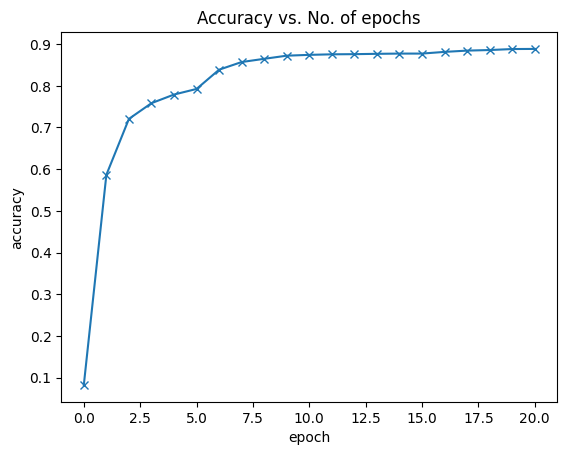

In [105]:
history = [result0]+ history1+ history2+ history3+ history4
accuracies = [result["val_acc"] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

In [106]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Here is the simple image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 7


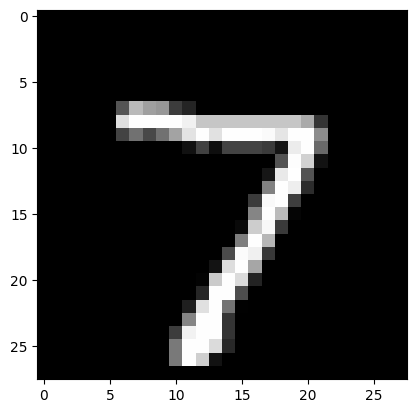

In [107]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [108]:
def predict_image(img, model):
  xb= img.unsqueeze(0)
  yb= model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 7 , Predicted: 7


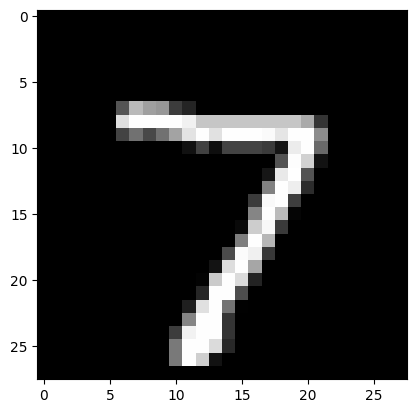

In [109]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


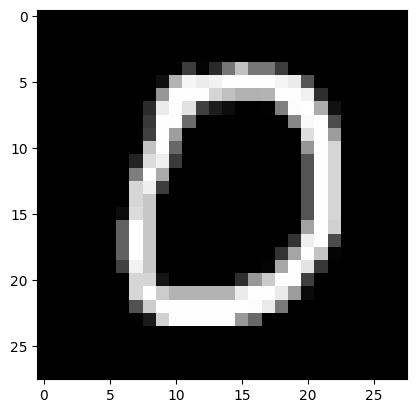

In [110]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Here is some drawback also in our model.

Label: 9 , Predicted: 3


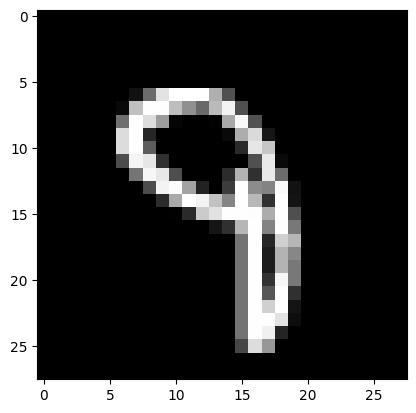

In [111]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


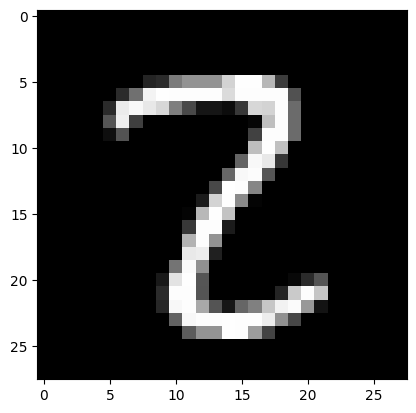

In [112]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [113]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.3841671943664551, 'val_acc': 0.898144543170929}

## Saving and loading the model

In [114]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [115]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0074, -0.0069,  0.0240,  ..., -0.0278, -0.0273,  0.0125],
                      [ 0.0294, -0.0069,  0.0201,  ...,  0.0183, -0.0290, -0.0230],
                      [-0.0221, -0.0252, -0.0085,  ..., -0.0120,  0.0293,  0.0281],
                      ...,
                      [-0.0295, -0.0031, -0.0306,  ...,  0.0215, -0.0090, -0.0159],
                      [-0.0117,  0.0137,  0.0063,  ..., -0.0084,  0.0188, -0.0223],
                      [-0.0077, -0.0265,  0.0308,  ..., -0.0323,  0.0130, -0.0050]])),
             ('linear.bias',
              tensor([-0.0793,  0.2259, -0.0429, -0.0613,  0.0456,  0.2245, -0.0114,  0.1282,
                      -0.3281, -0.0582]))])